In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\Gaurav Singh\OneDrive\Desktop\household_power_consumption.csv.txt',delimiter=';')

C:\Users\Gaurav Singh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
pd.set_option('display.max_rows',None)

In [7]:
df.isna().apply(pd.value_counts).T

,False,True
Date,2075259.0,NaN
Time,2075259.0,NaN
Global_active_power,2075259.0,NaN
Global_reactive_power,2075259.0,NaN
Voltage,2075259.0,NaN
Global_intensity,2075259.0,NaN
Sub_metering_1,2075259.0,NaN
Sub_metering_2,2075259.0,NaN
Sub_metering_3,2049280.0,25979.0


In [8]:
df.shape

(2075259, 9)

In [9]:
df['Time'].value_counts()

18:16:00    1442
18:33:00    1442
20:27:00    1442
18:48:00    1442
19:46:00    1442
19:07:00    1442
20:26:00    1442
18:26:00    1442
20:06:00    1442
17:40:00    1442
19:19:00    1442
18:21:00    1442
19:48:00    1442
19:53:00    1442
20:56:00    1442
19:04:00    1442
17:33:00    1442
21:02:00    1442
19:17:00    1442
18:19:00    1442
18:06:00    1442
17:39:00    1442
19:10:00    1442
18:37:00    1442
20:37:00    1442
19:45:00    1442
18:46:00    1442
20:34:00    1442
20:14:00    1442
19:01:00    1442
20:33:00    1442
19:16:00    1442
20:45:00    1442
19:30:00    1442
19:59:00    1442
19:57:00    1442
18:56:00    1442
19:51:00    1442
19:12:00    1442
17:26:00    1442
18:32:00    1442
20:12:00    1442
18:10:00    1442
20:53:00    1442
20:28:00    1442
20:16:00    1442
19:42:00    1442
18:04:00    1442
18:51:00    1442
19:00:00    1442
17:34:00    1442
18:41:00    1442
17:58:00    1442
19:55:00    1442
18:38:00    1442
20:18:00    1442
17:30:00    1442
19:22:00    1442
17:59:00    14

In [10]:
df.drop(['Date','Time'],axis=1,inplace=True)

In [11]:
df['Global_active_power']=df['Global_active_power'].replace('?',np.nan)
df['Global_active_power']=df['Global_active_power'].astype('float')

In [12]:
df['Global_reactive_power']=df['Global_reactive_power'].replace('?',np.nan)
df['Global_reactive_power']=df['Global_reactive_power'].astype('float')

In [13]:
df['Voltage']=df['Voltage'].replace('?',np.nan)
df['Voltage']=df['Voltage'].astype('float')

In [14]:
df['Global_intensity']=df['Global_intensity'].replace('?',np.nan)
df['Global_intensity']=df['Global_intensity'].astype('float')

In [15]:
df['Sub_metering_1']=df['Sub_metering_1'].replace('?',np.nan)
df['Sub_metering_1']=df['Sub_metering_1'].astype('float')

In [16]:
df['Sub_metering_2']=df['Sub_metering_2'].replace('?',np.nan)
df['Sub_metering_2']=df['Sub_metering_2'].astype('float')

In [17]:
df['Sub_metering_3'].fillna(df['Sub_metering_3'].median(),inplace=True)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Global_active_power')

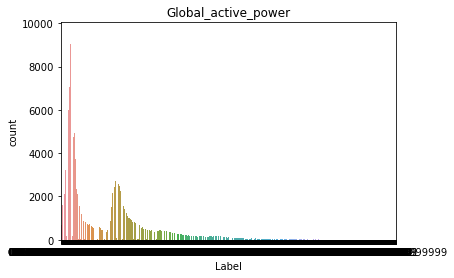

In [20]:
sns.countplot(df.Global_active_power)
plt.xlabel('Label')
plt.title('Global_active_power')

In [21]:
max_words = 1000
max_len = 150

In [22]:
import tensorflow as tf

In [23]:
print(tf.__version__)

2.9.1


In [24]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Input, Embedding, Dropout
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.models import Model

In [27]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object